# **Analiza Sezon is Košarkaške Zveze NBA**

Podatki so pobrani iz spletne strani [Basketball Reference](https://www.basketball-reference.com/). Poiskal bom največje število zmag znotraj ene sezone in najbolj dominantno ekipo in leto dominance.

In [21]:
import scraper

Definiranje konstant in osnovnih funkcij za urejanje podatkov. V funkciji Scraper je dodan `time.sleep(5)` zaradi pogoste napake spletne strani `429 - Too many requests`. Scrapanje traja 3 minute :\)

In [22]:
data = scraper.Scraper(scraper.ALL_TEAMS)

# Sortiranje podatkov

Spodaj je prikazanih 5 najbolj zmagovitih ekip in sezone v katerih so bile zmage osvojene. Te so Golden State Warriors leta 2016 z 73, Chicago Bulls leta 1996 z 72 in leta 1997 z 69. Los Angeles Lakers leta 1972 z 69 zmagami in Boston Celtics leta 1973 z 68 zmagami.

In [23]:
scraper.Sort_teams(data, "wins")[:5]

[(73, '2015-16', 'GSW'),
 (72, '1995-96', 'CHI'),
 (69, '1996-97', 'CHI'),
 (69, '1971-72', 'LAL'),
 (68, '1972-73', 'BOS')]

Naslednja funkcija ločuje ekipe po mojem kriteriju dominance. Sešteje odstotek zmag, število točk v 100ih posegih in število dovoljenih točk v 100ih posegih (to število je negativno zato sem ga spremenil v pozitivnega). Zaradi praznih nizov sem ustvaril pomožno funkcijo ki jih spremeni v ničle.

Opazimo, da so najbolj dominantne ekipe tiste, ki so bile tekom let tudi najbolj hvaljene. Te so Golden State Warriors leta 2017, Chicago bulls v koncu 90ih, Los Angeles Lakers v 70ih in Philadelphia 76ers v 60ih.

In [24]:
scraper.Sort_by_dominance(data)[:5]

[(10.117, '2024-25', 'CLE'),
 (9.007, '2015-16', 'GSW'),
 (8.914, '1995-96', 'CHI'),
 (8.53, '1996-97', 'CHI'),
 (8.515, '1971-72', 'LAL')]

Opazimo odstopanje v številu sezon z 0 zmagami. To je posledica letošnje sezone, ki se še ni začela/končala.

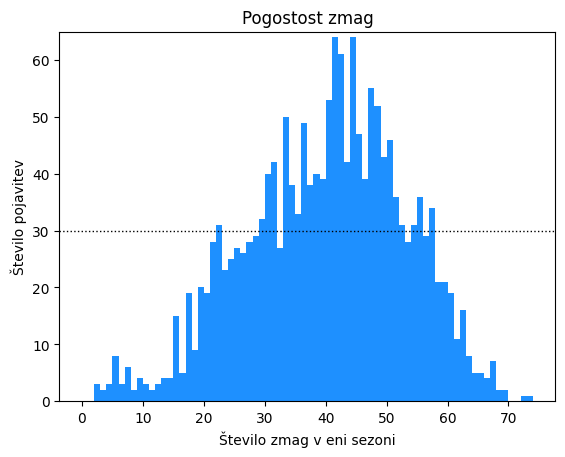

In [26]:
count = list()
for x in scraper.Sort_teams(data, "wins"):
    count.append(x[0])

scraper.plt.hist(count, bins=range(75), color="dodgerblue")
scraper.plt.title("Pogostost zmag")
scraper.plt.xlabel("Število zmag v eni sezoni")
scraper.plt.ylabel("Število pojavitev")
scraper.plt.ylim(0, 65)
scraper.plt.axhline(30, color="k", linestyle="dotted", linewidth=1)

# Zaključek

Zaradi načina shranjevanja podatkov v slovarje slovarjev slovarjev sem imel težave z dostopanjem do podatkov in njihovim urejanjem. To je tudi vzrok, zakaj ne berem podatkov iz datoteke, čeprav jih tja shranim. Ne vem kako bi pretvoril niz nazaj v slovar, brez da bi izgubil nekaj njegove strukture ali porabil preveč časa/prostora.

Sprva sem želel ustvariti program, ki bi potekal v ukazni vrstici, vendar sem to opustil zaradi zahtev predmeta.